# Thông tin nhóm
## Nhóm 1
- 19127368 - Hồ Ngọc Minh Đức
- 19127057 - Trần Vĩnh Phát
- 19127476 - Trần Thị Huế Minh
- 19127552 - Nguyễn Thanh Thảo

# Bài làm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

In [2]:
palette = sns.color_palette("Blues_d")
palette.reverse()

In [3]:
df=pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Quan sát và mô tả dữ liệu

### 1) Kiểu dữ liệu của các thuộc tính

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Mô tả các thuộc tính
    - id: listing ID
    - name: name of the listing
    - host_id: host ID
    - host_name: name of the host
    - neighbourhood_group: location
    - neighbourhood: area
    - latitude: latitude coordinates
    - longitude: longitude coordinates
    - room_type: listing space type
    - price: price in dollars
    - minimum_nights: amount of nights minimum
    - number_of_reviews: number of reviews
    - last_review: latest review
    - reviews_per_month: number of reviews per month
    - calculated_host_listings_count: amount of listing per host
    - availability_365: number of days when listing is available for booking

#### Nhận xét
+ Các thuộc tính id, host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365 có kiểu dữ liệu int64

+ Các thuộc tính name, host_name, neighbourhood_group, neighbourhood, room_type, last_review, có kiểu dữ liệu object

+ Các thuộc tính latitude, longitude, reviews_per_month có kiểu dữ liệu float64

### 2) Phân tích Price

In [6]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
# Tính mode của giá phòng
print("mode of price: ", df['price'].mode())

mode of price:  0    100
Name: price, dtype: int64


- Giá phòng cao nhất: 10000 usd

- Giá phòng thấp nhất: 0 usd

- Giá phòng trung bình: 152.720687 usd

- Mức giá xuất hiện nhiều: 0 usd, 100 usd

- Độ lệch chuẩn của cột price: 240.154170


In [8]:
# Tính median của giá phòng
print("median of price: ", statistics.median(df['price']))

median of price:  106


#### Nhận xét: 
    - Mean = 152.720687
    - Median = 106
- Suy ra: 
    - Mean > Median > Mode (100)
- Suy đoán:
    - Phân phối của tập dữ liệu giá phòng bị lệch về bên trái
- Kết luận về phân phối của giá phòng:
    - Giá phòng phân phối cách xa trung tâm 

In [9]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Distribution of price(in USD)')

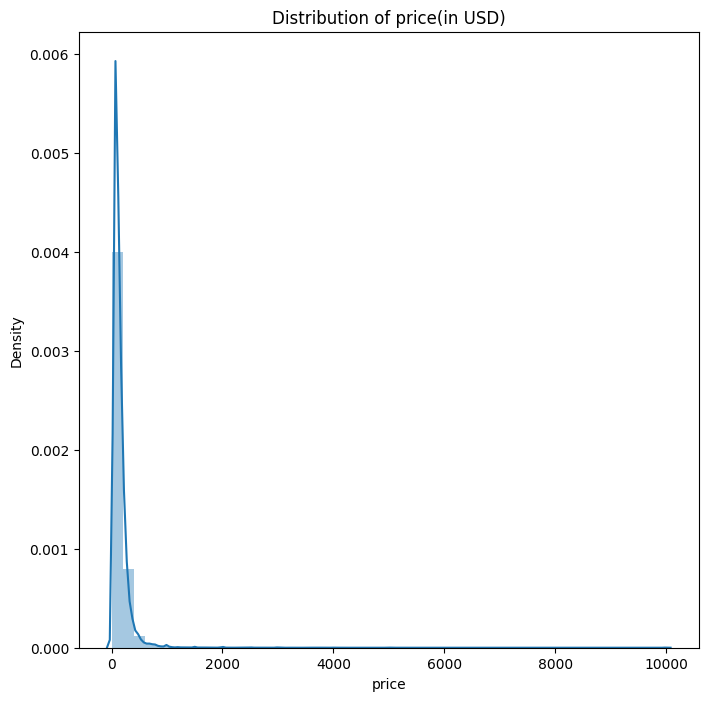

In [10]:
# Vẽ đồ thị histogram
plt.figure(figsize=(8,8))
sns.distplot(df['price'],bins=50,kde=True)
plt.title("Distribution of price(in USD)")

#### Nhận xét
- Biểu đồ phân phối trên cho thấy thuộc tính "Price" có một độ lệch dương

### 3) Mô tả số lượng missing values của mỗi thuộc tính

In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- name có 16 dòng null

- host_name có 21 dòng null

- last_review có 10052 dòng null

- previews_per_month có 10052 dòng null

### 4) Tính tỉ lệ % missing values của mỗi thuộc tính

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

#### Nhận xét
- name có tỉ lệ missing values là: 0.032723%

- host_name có tỉ lệ missing values là: 0.042949%

- last_review có tỉ lệ missing values là: 20.558339%

- reviews_per_month có tỉ lệ missing values là: 20.558339%

### 5) Xử lý missing value

- Xử lý missing value ở cột name: 
    - Điền giá trị "No name provided" tại cái giá trị null trong cột name
    
- Xử lý missing value ở cột host_name:
    - Điền giá trị "No host name provided" tại cái giá trị null trong cột host_name  
    
- Xử lý missing value ở cột last_review
    - Điền giá trị "No last review provided" tại các giá trị null trong cột last_review
    
- Xử lý missing value ở cột reviews_per_month
    - Điền giá trị 0 cho các giá trị null trong cột last_review
    
#### Giải thích: 
Vì dữ liệu mỗi cột name, host_name, last_preview, reviews_per_month cho biết tên Khách sạn, tên chủ nhà, ngày đánh giá và phần trăm đánh giá mỗi tháng. Những dữ liệu này không ảnh hưởng quá nhiều đến kết quả phân tích nhưng phần trăm missing value khá lớn, nếu xóa các hàng chứa missing  value sẽ gây mất mát một lượng lớn số liệu thống kê. Ảnh hưởng đến kết quả phân tích cuối cùng.

In [13]:
df.name.fillna("No name provided", inplace = True)
df.host_name.fillna("No host name provided", inplace = True)
df.last_review.fillna("No last review provided", inplace = True)
df.reviews_per_month.fillna("0", inplace = True)

In [14]:
#Kiểm tra các giá trị null đã được fill hay chưa
df.isnull().sum() * 100 / len(df)

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

### 6) Outlier

<AxesSubplot: >

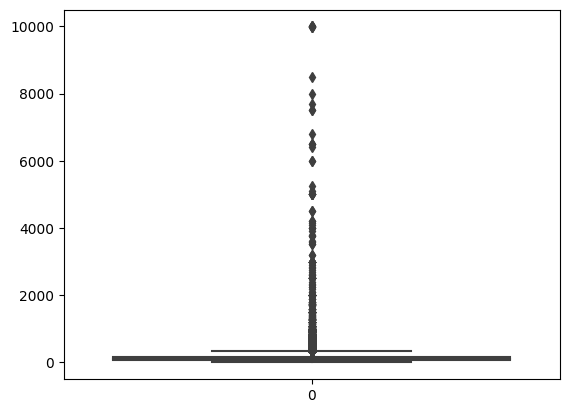

In [15]:
# Kiểm tra outlier
sns.boxplot(df['price'])

#### Nhận xét
- Thuộc tính price có tồn tại outlier

## Visualize dữ liệu dạng bảng hoặc đồ thị

### 1. Có bao nhiêu “neighbourhood_group”, liệt kê không trùng danh sách này. Lập bảng thống kê gồm neighbourhood_group, tần suất, % lượt thuê phòng của mỗi neighbourhood_group.

In [16]:
field = 'neighbourhood_group'
df[field].value_counts().to_frame('Count')

,Count
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


Nhận xét:
- Có 5 neighbourhood_group là: 
    - Manhattan
    - Brooklyn
    - Queens
    - Bronx
    - Staten Island

In [17]:
# Tần suất của neighbourhood_group
(df.neighbourhood_group.value_counts() / len(df)).to_frame("Frequency")

,Frequency
Manhattan,0.443011
Brooklyn,0.411167
Queens,0.115881
Bronx,0.022313
Staten Island,0.007629


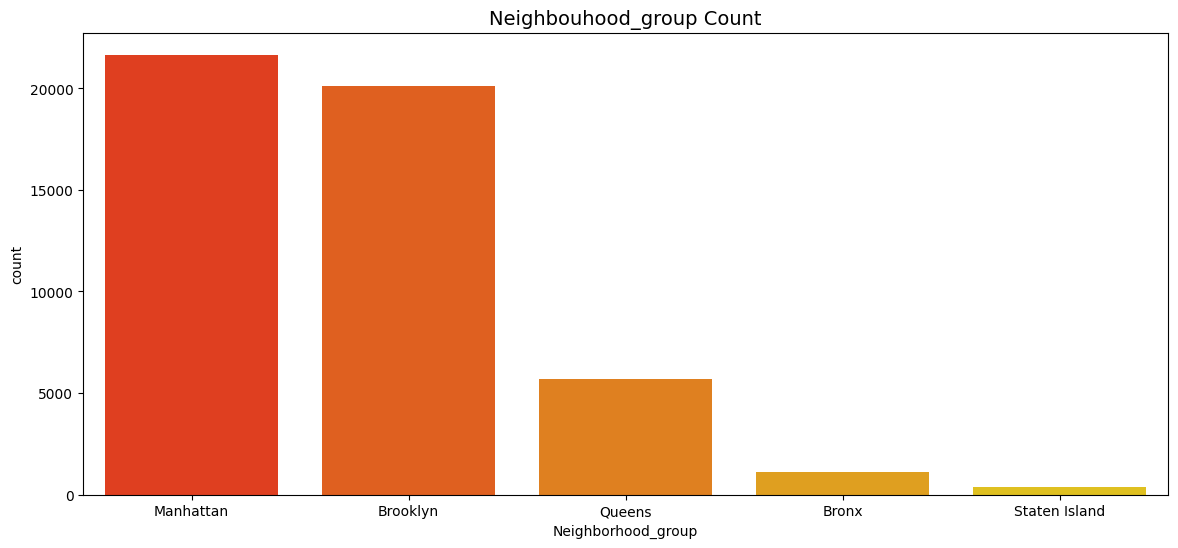

In [18]:
# Đồ thị thể hiện số lượng giá trị của các neighbourhood_group
plt.figure(figsize=(14,6))
g = sns.countplot(x = 'neighbourhood_group', data = df, palette = 'autumn',
                  order=df['neighbourhood_group'].value_counts().index)
plt.xlabel("Neighborhood_group",fontdict= {'size':10})
plt.title("Neighbouhood_group Count", size=14)
plt.show()

Nhận xét:
- Manhattan có lượng phòng cho thuê nhiều nhất trong danh sách các vùng lân cận được thu thập.
- Staten Island là vùng có lượng phòng cho thuê thấp nhất.

### 2. Có bao nhiêu room_type, liệt kê không trùng. Lập bảng thống kê room_type, tần suất và % lượt thuê cho từng room_type. Vẽ bar chart để so sánh.

In [19]:
field = 'room_type'
df[field].value_counts().to_frame('Count')

,Count
Entire home/apt,25409
Private room,22326
Shared room,1160


Nhận xét:
- Có 3 room_type là: 
    - Entire home/apt
    - Private room
    - Shared room

In [38]:
# Tần suất của room_type
(df.room_type.value_counts() / len(df)).to_frame("Frequency")

,Frequency
Entire home/apt,0.519665
Private room,0.456611
Shared room,0.023724


<AxesSubplot: ylabel='room_type'>

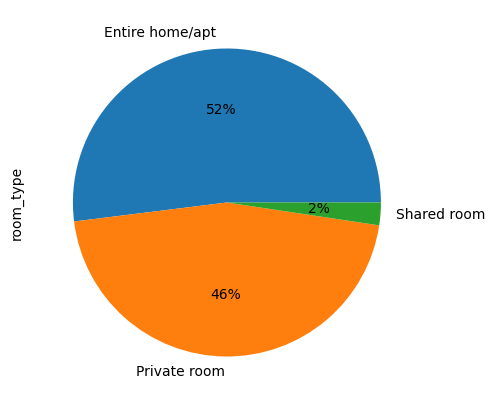

In [21]:
# Bar chart % thuê phòng của các room_type
ax2 = plt.figure(figsize=(5,5), dpi=100)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=10)

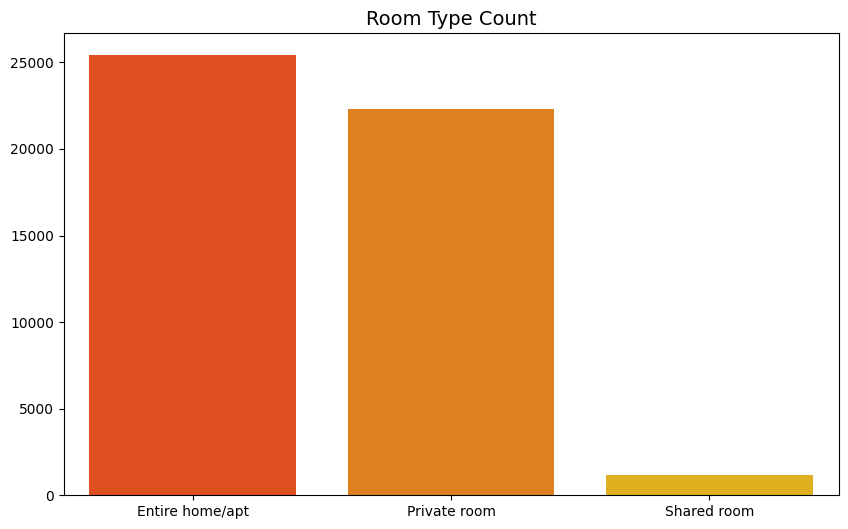

In [22]:
# Đồ thị thể hiện các giá trị của room_type
plt.figure(figsize=(10,6))
g = sns.countplot(x = 'room_type', data = df, palette = 'autumn',
                  order=df['room_type'].value_counts().index)
plt.xlabel("",fontdict= {'size':10})
plt.ylabel("")
plt.title("Room Type Count", size=14)
plt.show()

Nhận xét:
- Loại phòng Entire home/apt chiếm số lượng nhiều nhất 
- Loại phòng Shared room chiếm số lượng ít nhất
- 

### 3. Giá trung bình mỗi đêm

In [41]:
# Tính giá trung bình mỗi đêm theo loại phòng
da = (df.groupby('room_type')['price'].mean()).to_frame('Mean')
da

,Mean
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


<AxesSubplot: xlabel='room_type', ylabel='price_mean'>

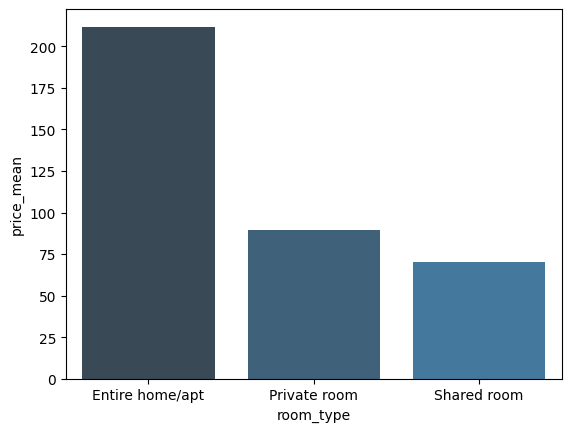

In [23]:
# Đồ thị biểu diễn giá trung bình mỗi đêm theo loại phòng
tmp = df.groupby('room_type').agg(
    price_mean=pd.NamedAgg(column='price', aggfunc='mean')
).reset_index()
sns.barplot(x='room_type', y='price_mean', data=tmp, palette=palette)

##### Nhận xét
- Entire home/apt có giá trung bình mỗi đêm cao nhất 
- Shared room có giá trung bình mỗi đêm thấp nhất 
- Private room có giá trung bình mỗi đêm thấp hơn nhiều so với Entire home/apt nhưng vẫn cao hơn Shared room

### 4. Có sự khác biệt gì giữa lưu trú tại Shared room và Entire Room giữa các vùng lân cận?

<AxesSubplot: xlabel='room_type', ylabel='count'>

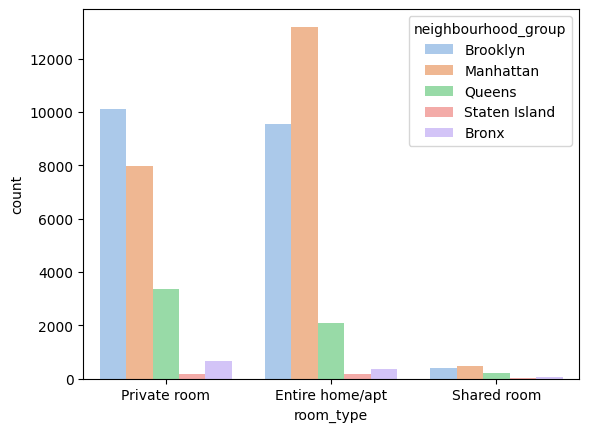

In [24]:
# Bar chart số lượng phòng thuê theo các room_type ở các vùng lân cận (Quan sát chung)
sns.countplot(x='room_type', hue="neighbourhood_group", data=df,  palette = "pastel")

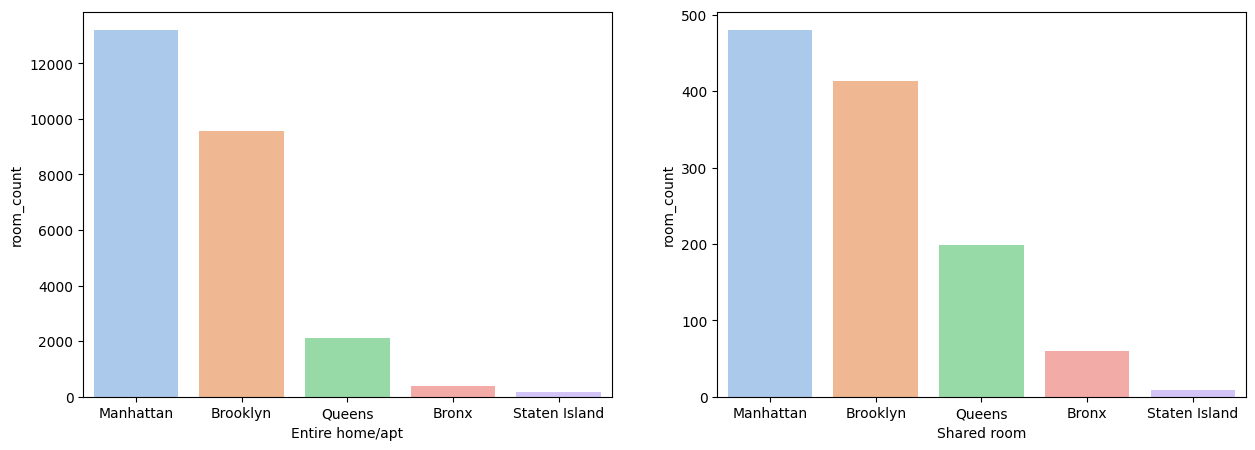

In [25]:
# Bar chart số phòng thuê 2 loại phòng Entrie home/apt và Shared room tại các vùng lân cận theo 
data = df.groupby(['room_type']).agg(room_count=pd.NamedAgg(column='neighbourhood_group', aggfunc='value_counts')).reset_index()
room_type = ['Entire home/apt', 'Shared room']
nbgroup = data.neighbourhood_group.unique()
fig,ax=plt.subplots(1, len(room_type),figsize=(15,5));
for i, rtype in enumerate(room_type):
    ax[i] = sns.barplot(x = 'neighbourhood_group', y = 'room_count', data = data[data.room_type == rtype], ax =ax[i],  palette = "pastel")
    ax[i].set(xlabel=rtype)
plt.show()

In [26]:
# Chia loại giá phòng
def groupPrice(price):
    if price < 100:
        return "Low Cost"
    elif price >=100 and price < 200:
        return "Middle Cost"
    else:
        return "High Cost"
      
price_group = df['price'].apply(groupPrice)
df.insert(10, "price_group", price_group, True)

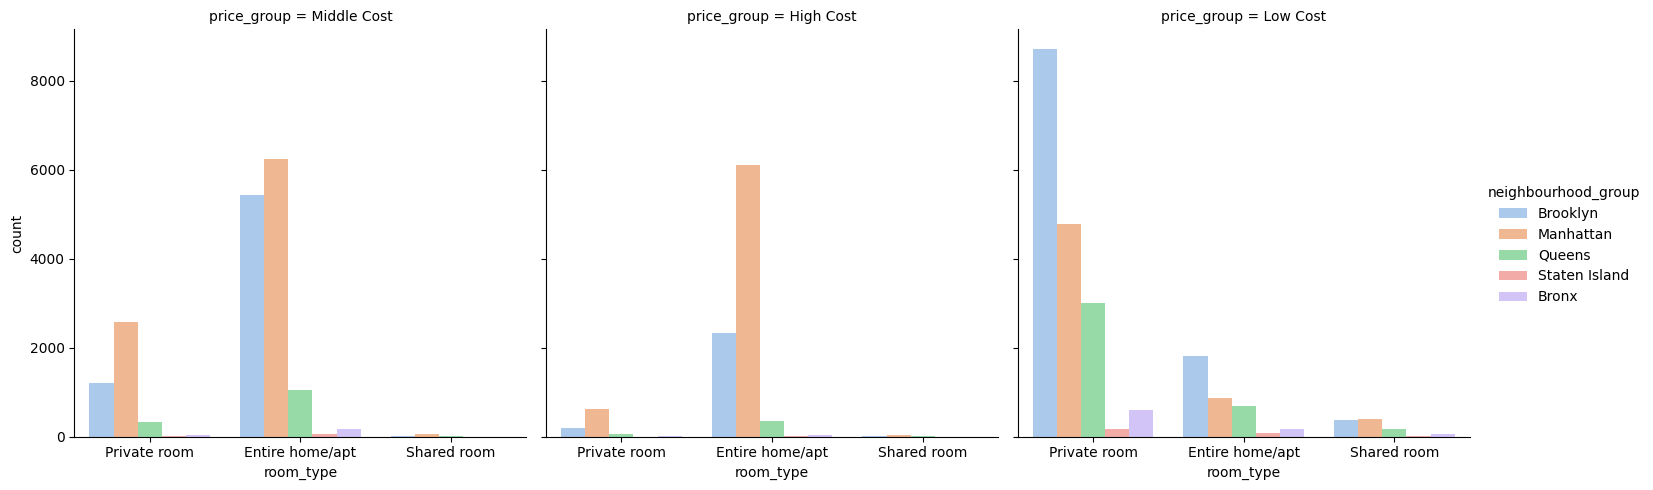

In [27]:
# Bar chart thống kê số lượng phòng của các room_type theo loại giá phòng ở các vùng lân cận
sns.catplot(x="room_type", hue="neighbourhood_group", col="price_group", data=df, kind="count", height=5, aspect=1, palette='pastel')
plt.show()

#### Nhận xét
##### Theo số lượng phòng
- Loại phòng “Entire home/apt” theo biểu đồ cho thấy số lượng luôn có sẵn để phục vụ khách hàng khi có nhu cầu

- Trong khi đó, số lượng “Shared room” rất hạn chế ở tất cả các vùng lân cận 

##### Theo mức giá phòng
- Ở mức giá trung bình, Manhattan cho nhiều sự lựa chọn về "Entire home/apt" nhất sau đó là Brooklyn. Ở mức giá trung bình "Shared room" rất ít sự lựa chọn

- Ở mức giá cao, Manhattan chiếm áp đảo sự lựa chọn về "Entire home/apt". "Shared room" cũng rất ít sự lựa chọn

- Ở mức giá thấp, Brooklyn cho nhiều sự lựa chọn về "Entire home/apt" nhất, sau đó là Manhattan. "Shared room" ở mức giá này có nhiều sự lựa chọn hơn 2 mức giá trước.

### 5. Giá trung bình cho các private room

In [36]:
da=df[df.room_type=='Private room'].groupby(['neighbourhood_group'])['price'].mean()
print(da)

neighbourhood_group
Bronx             66.788344
Brooklyn          76.500099
Manhattan        116.776622
Queens            71.762456
Staten Island     62.292553
Name: price, dtype: float64


In [29]:
# Bảng thống kê giá trị trung bình của các private room
dt=pd.DataFrame(data=da).reset_index()
dt

,neighbourhood_group,price
0,Bronx,66.788344
1,Brooklyn,76.500099
2,Manhattan,116.776622
3,Queens,71.762456
4,Staten Island,62.292553


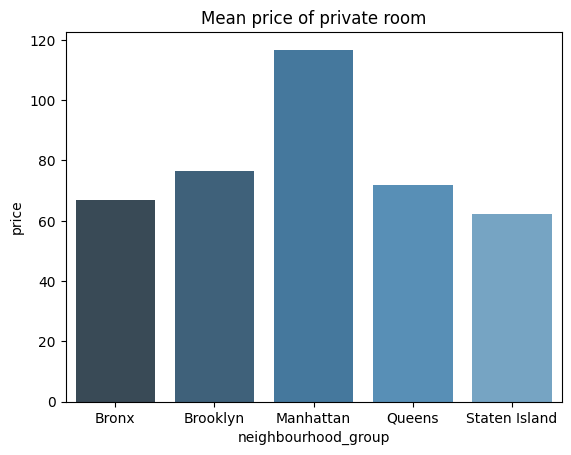

In [30]:
# Đồ thị giá trung bình các private room tại các vùng lận cận
sns.barplot(y="price", x="neighbourhood_group", data=dt, palette=palette)
plt.title("Mean price of private room")
plt.grid(False)

#### Nhận xét
- Giá trung bình cho Private room khá tương đồng ở các vùng lân cận

- Trong đó:
    - Manhattan có giá trung bình cho Private room cao nhất
    
    - Staten Island có giá trung bình cho Private room thấp nhất

### 6. Vùng có lưu trú rẻ nhất

In [31]:
# Tính giá trung bình của các vùng lân cận
df.groupby("neighbourhood_group")["price"].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [32]:
# Bảng thống kê giá trung bình của các vùng lân cận theo thứ tự tăng dần
m_df=df.groupby("neighbourhood_group")["price"].mean().to_frame().reset_index().sort_values(by='price')
m_df

,neighbourhood_group,price
0,Bronx,87.496792
3,Queens,99.517649
4,Staten Island,114.812332
1,Brooklyn,124.383207
2,Manhattan,196.875814


<AxesSubplot: xlabel='neighbourhood_group', ylabel='price'>

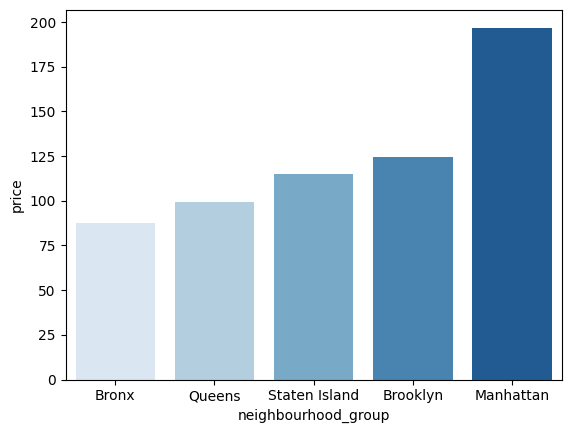

In [33]:
# Đồ thị hiển thị giá trung bình tại các vùng lân cận
sns.barplot(m_df, x='neighbourhood_group', y='price', palette='Blues')

#### Kết luận
- Vùng có giá lưu trú rẻ nhất là Bronx 

### 7. Giá trung bình của từng loại phòng ở các vùng lân cận

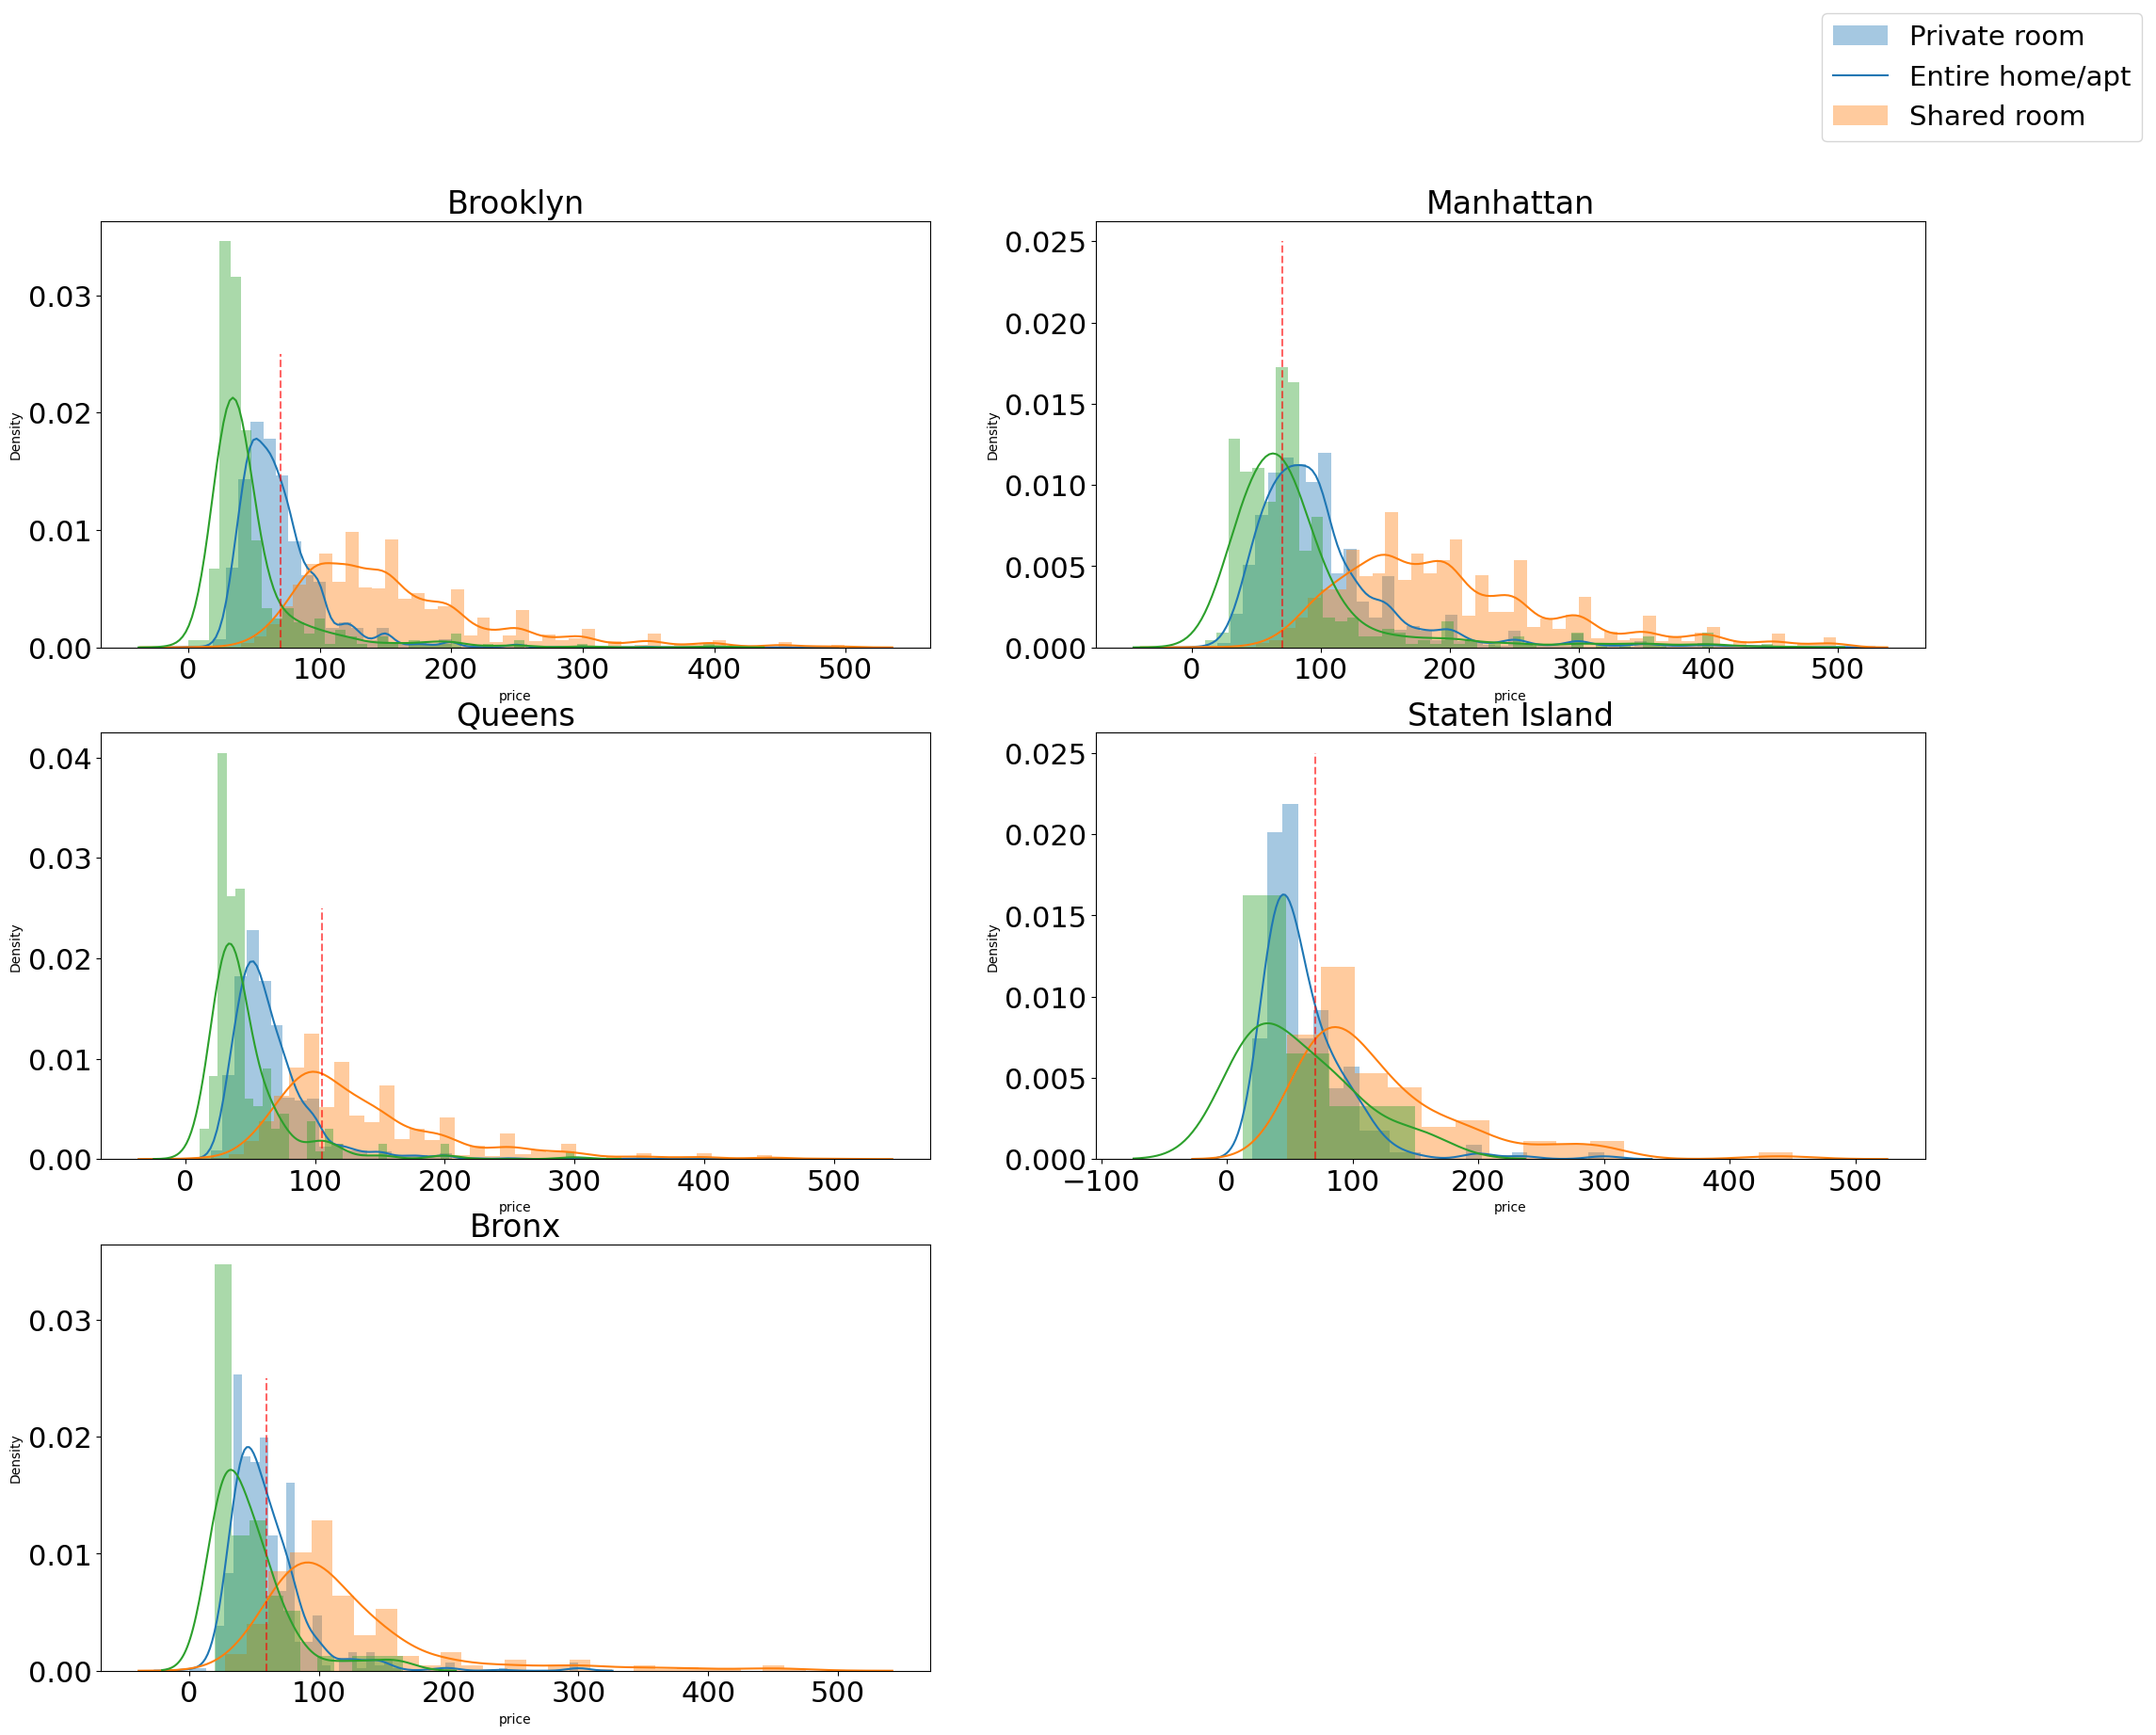

In [34]:
fig,ax=plt.subplots(3,2,figsize=(25,20))
df_=df.loc[df["price"]<500]
cols = df.neighbourhood_group.unique()
labels = df.room_type.unique()
index=0
for r in range(3):
    for c in range(2):
        if(index==5):
            break
        ddf=df_.loc[df_["neighbourhood_group"]==cols[index]]
        ax[r][c].set_title(cols[index],fontsize=24)
        ax[r][c].xaxis.set_tick_params(labelsize=22)
        ax[r][c].yaxis.set_tick_params(labelsize=22)
        
        for i in range(3):
            sns.distplot(ddf.loc[ddf["room_type"]==labels[i]]["price"],label=labels[i],ax=ax[r][c])
        index+=1    


ax[-1, -1].axis('off')

fig.legend(labels,fontsize=21);


ax[0][0].plot([70,70 ],[0,0.025],"r--",alpha=0.6);

ax[0][1].plot([70,70 ],[0,0.025],"r--",alpha=0.6);

ax[1][0].plot([105,105 ],[0,0.025],"r--",alpha=0.6);

ax[1][1].plot([70,70 ],[0,0.025],"r--",alpha=0.6);

ax[2][0].plot([60,60 ],[0,0.025],"r--",alpha=0.6);

#### Chú thích
- Đường màu đỏ là mức giá phổ biến được cung cấp ở các khu vực cụ thể

#### Nhận xét
- Ở 1 số nơi, Shared room có giá trung bình thấp hơn trong khi toàn bộ Entire home/apt có mức giá trung bình cao hơn

- Private room ở Staten Island có số lượng nhiều hơn so với phần còn lại

### Kết luận các điểm chính quan sát được từ dữ liệu từ các gợi ý câu 4

##### + Loại phòng Entire home/apt có lượng phòng cho thuê nhiều nhất ở tất cả các vùng lân cận.
        - Số lượng loại phòng Entire home/apt là nhiều nhất đối với mức giá cao và trung bình 

##### + Loại phòng Shared room có lượng thuê phòng ít nhất tại các vùng lân cận.
        - Manhattan có số lượng phòng cho thuê loại Shared room nhiều nhất theo mọi loại giá 
        - Số lượng loại phòng Entire home/apt ở mức giá thấp nhiều hơn so với mức giá cao và trung bình 
    
##### + Loại phòng private room có lượng phòng cho thuê ở mức ổn định nhất. 
        - Số lượng loại phòng Private room chiếm ưu thế khi tìm kiếm phòng có mức giá thấp 
    
##### + Về giá phòng của loại Entire home/apt và Private room
        - Manhattan đứng đầu về số lượng phòng có mức giá cao và trung bình
        - Brooklyn đứng đầu về số lượng phòng ở mức giá thấp 